# Exam

Develop a model for predicting review rating.  
**Multiclass classification into 5 classes**  
Score: **F1 with macro averaging**  
You are forbidden to use test dataset for any kind of training.  
Remember proper training pipeline.  
If you are not using default params in the models, you have to use some validation scheme to justify them. 

Use `random_state` or `seed` params - your experiment must be reprodusible.


### 1 baseline = 0.51
### 2 baseline = 0.53


## Question

GPT-2 is the autoregressive model to solve Language Modelling task - predicting the most probable token given the context sequence. GPT-2 may be used for some other tasks like text classification but the is not the main purpose of that model. (based on the transformer architecture)

BERT is the model to solve Masked Language Modelling task - substituting missing tokens. Originally it was also trained to predict if the second sentence is a continuation of the first taking them continuated in one sequence. For theat purpose BERT has additional segment embedding layer (works same as the other embeddings layers in BERT and GPT-2). Also BERT uses special classification token in the front of the whole sequence for classification tasks. One may take the last hidden state of that token for his classification purposes.

In [0]:
from zipfile import ZipFile

with ZipFile('exam_data.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [0]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt

In [0]:
SEED = 42

In [21]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_train.shape

(48192, 3)

In [0]:
df_train['cat'] = df_train['title'] + ' ' + df_train['review']

In [51]:
df_train[:10]

,review,title,target,cat
0,"The staff was very friendly, the breakfast ver...",Walker Gem,5,"Walker Gem The staff was very friendly, the br..."
1,Excellent service - very approachable and prof...,Excellent Service,4,Excellent Service Excellent service - very app...
2,Really a top notch place to spend a day at the...,"Good location, warm and friendly staff",5,"Good location, warm and friendly staff Really ..."
3,"a little noisy, there was a false fire alarm a...","nice hotel,",4,"nice hotel, a little noisy, there was a false ..."
4,Place had too many animals and I'm allergic to...,Experience,3,Experience Place had too many animals and I'm ...
5,Hotel has a great location right on Virginia B...,"great location, subpar staff",3,"great location, subpar staff Hotel has a great..."
6,The hotel was ok to stay just had minor things...,"Hotel is close to shopping, restaurants, airport",3,"Hotel is close to shopping, restaurants, airpo..."
7,"Stayed here on way to MB. Warm evening, left d...",Ok for one night,3,Ok for one night Stayed here on way to MB. War...
8,We wanted a quiet get away. We had a great tim...,great weekend,5,great weekend We wanted a quiet get away. We h...
9,Bad: Please take heed to this warning do not s...,Do not stay here cars broken into on property ...,1,Do not stay here cars broken into on property ...


In [52]:
df_train.iloc[256]['review']

'Room was a little dirty Murrow needed to be replaced with new mirror'

(array([ 3742.,     0.,  3730.,     0.,     0.,  7380.,     0., 13789.,
            0., 19551.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

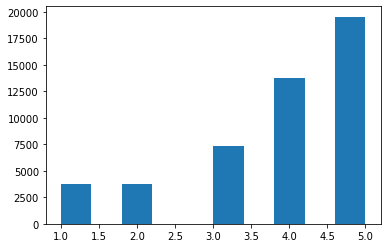

In [53]:
plt.hist(df_train.target)
plt.show()

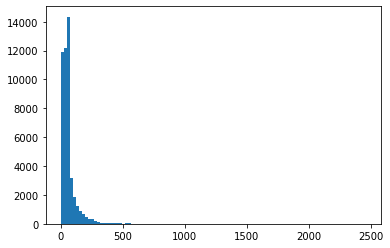

In [54]:
plt.hist([len(x.split()) for x in df_train.review], bins=100)
plt.show()

In [0]:
df_test['cat'] = df_test['title'] + ' ' + df_test['review']

In [0]:
from sklearn.pipeline import Pipeline

In [0]:
import numpy as np

In [0]:
tfidf_review = TfidfVectorizer(stop_words='english', max_features=3500, sublinear_tf=True, min_df=50,
                       ngram_range=(1, 4))
tfidf_title = TfidfVectorizer(stop_words='english', max_features=450, sublinear_tf=True, min_df=50,
                       ngram_range=(1, 2))
review_features = tfidf_review.fit_transform(df_train.review).toarray()
title_features = tfidf_title.fit_transform(df_train.title).toarray()
features = np.concatenate((title_features, review_features), axis=1)
labels = df_train.target

review_features = tfidf_review.transform(df_test.review).toarray()
title_features = tfidf_title.transform(df_test.title).toarray()
test_features = np.concatenate((title_features, review_features), axis=1)
test_labels = df_test.target

In [166]:
title_features.shape

(5355, 450)

In [167]:
log_reg = LogisticRegression(random_state=SEED, verbose=True, max_iter=100, n_jobs=-1, warm_start=True)
log_reg.fit(features, labels)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.8min finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=42,
                   solver='lbfgs', tol=0.0001, verbose=True, warm_start=True)

In [168]:
print(f"{f1_score(labels, log_reg.predict(features), average='macro'):.2f}")
print(f"{f1_score(test_labels, log_reg.predict(test_features), average='macro'):.2f}")

0.62
0.51
